# CPHASE: leakage vs gate time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import matplotlib
import json

In [2]:
tex_rc_params = {
    'backend': 'ps',
    #'text.latex.preamble': [r'\usepackage{gensymb}'],
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    #'text.usetex': True,
    'font.family': 'serif',
}

%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

In [3]:
with open("cphase_data/leakage_vs_gate_time_data.txt") as my_file:
    result = json.load(my_file)

In [4]:
def plot_leakage(
    result: List[dict],
    tex_rc_params: dict,
    save=False
):
    with plt.rc_context(tex_rc_params):
        fig, ax = plt.subplots( 
            figsize=(3.39, 2.6189190273276797), 
            constrained_layout=True
        )
        
        matplotlib.rcParams['mathtext.fontset'] = 'cm'
        cmap_red = matplotlib.cm.get_cmap('Reds')
        colors_list = [cmap_red(1.0), cmap_red(0.8), cmap_red(0.6), cmap_red(0.4)]
        count = 0
        labels_list = ["$\pi$", "$5\pi/4$", "$3 \pi/2$", "$7 \pi/4$"]
        for res in result:
            ax.semilogy(res["gate_time_list"], res["avg_leakage"], color=colors_list[count], 
                        label=labels_list[count])
            ax.semilogy(res["gate_time_list"], res["avg_leakage_noise"], color=colors_list[count], linestyle='--')
            count += 1
        ax.set_xlabel("$t_{\\mathrm{gate}} \, (\\mathrm{ns})$")
        ax.set_ylabel("$L_1$")
        x_ticks = [70 + 10*x for x in range(0, 8)]
        ax.set_xticks(x_ticks)
        x_tick_labels = ['$' + str(x) + '$' for x in x_ticks ]
        y_ticks = [0.01, 0.001, 0.0001]
        ax.set_yticks(y_ticks)
        y_tick_labels = ['$10^{-2}$', '$10^{-3}$', '$10^{-4}$']
        ax.set_yticklabels(y_tick_labels)
        ax.set_xticklabels(x_tick_labels)
        ax.tick_params(axis='both')
        plt.legend()
        if save:
            plt.savefig("cphase_leakage_fig.svg")
            plt.savefig("cphase_leakage_fig.pdf")
        plt.show()
    
    

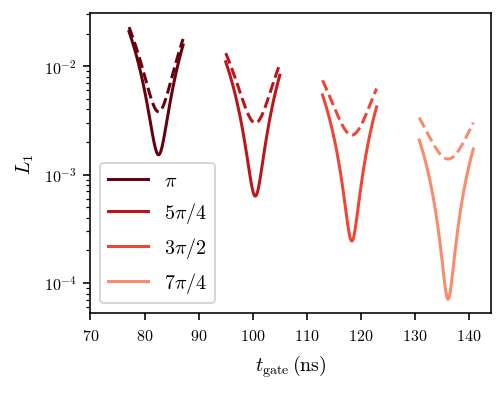

In [5]:
plot_leakage(result, tex_rc_params, save=False)